## Importación de paquetes

En primer lugar, debe importar Seaborn para visualización, NumPy y Pandas. Además, importar

LogisticRegression para ajustar el modelo.
confusion_matrix y classification_report para evaluar el modelo.

Los pasos para construir una regresión logística incluyen:

* Importar los paquetes, clases y funciones.
* Cargar los datos.
* Análisis exploratorio de datos (AED/EDA).
* Transformar los datos si es necesario.
* Ajustar el modelo de clasificación.
* Evaluar el modelo de rendimiento.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Cargar el conjunto de datos

Importa el conjunto de datos de Social Network Ads desde Kaggle. Se trata de un archivo CSV con datos que nos ayudarán a construir un modelo de regresión logística para mostrar qué usuarios compraron o no un producto.

In [16]:
social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


## Exploratory Data Analysis

Analizar primero los datos es clave para comprender sus características. Empezaremos por comprobar los valores que faltan.

In [9]:
social_N_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

Compruebe el número total de los que compraron y de los que no compraron:
- Cero indica los que no compraron y 1 los que compraron.


<Axes: xlabel='Purchased', ylabel='count'>

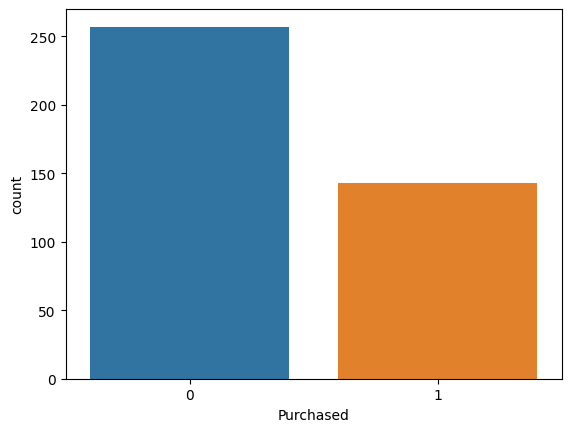

In [10]:
sns.countplot(x='Purchased', data=social_N_data)

Compruebe cuántos hombres y mujeres han comprado el producto:

<Axes: xlabel='Purchased', ylabel='count'>

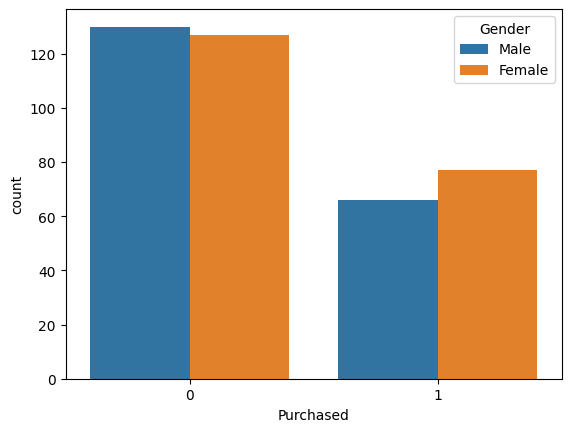

In [11]:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)



Del gráfico se deduce que la mayoría de los que no compraron son hombres y la mayoría de los que compraron son mujeres. También podemos comprobar la distribución por edades en el conjunto de datos:

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


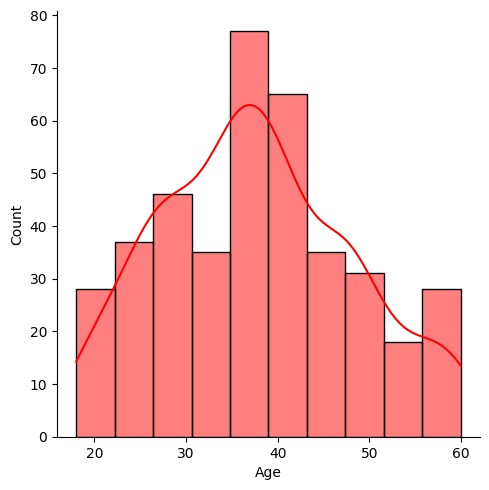

In [13]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


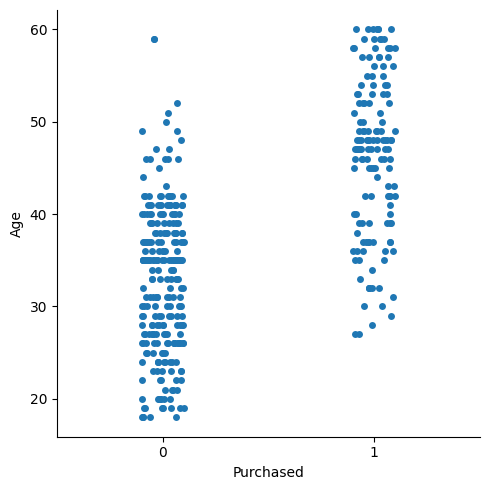

In [66]:
sns.catplot(x="Purchased", y="Age", data=social_N_data)
plt.show()

## Cleaning the data

Utilizaremos las columnas Sexo, Edad y Salario estimado del conjunto de datos para la regresión logística. Esto significa que no necesitamos la columna UserID. Por lo tanto, la eliminaremos.

In [17]:
social_N_data.drop('User ID', axis=1, inplace=True)
social_N_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Changing categorical data into dummies

Veamos la información del conjunto de datos para hacernos una idea general de lo que contiene.

In [18]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


La variable Género es categórica. Para que el modelo funcione, la convertiremos en variables ficticias utilizando el método Pandas get_dummies o el método oneHotEncoder.

- Cambie Género a variable dummy y elimine la primera variable dummy para evitar la multicolinealidad:

In [19]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [20]:
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [21]:
social_N_data = pd.concat([social_N_data,gender], axis=1)
social_N_data


,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


Cuando el valor Masculino es 1, significa que el género es masculino, y cuando el valor es 0, que el género es femenino. No necesitamos las variables Mujer y Sexo en el conjunto de datos, ya que una puede utilizarse para predecir la otra.

## División de los datos en variables independientes(X) y dependientes(y)

Divida los datos en variables independientes y dependientes.

In [22]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [25]:
y = social_N_data.iloc[:, 2] # Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Feature scaling

El escalado de características es un método utilizado para normalizar el rango de las variables independientes. El método permite que las variables independientes estén en el mismo rango.

Cuando se trabaja con grandes conjuntos de datos, el escalado desempeña un papel importante en la mejora del rendimiento del modelo.

En los datos, importaremos el StandardScaler del módulo de preprocesamiento de Scikit-learn y lo utilizaremos para transformar los datos. Por ejemplo, hay una gran diferencia entre los valores de la variable Edad y los de SalarioEstimado.


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

## Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba mediante la función train_test_split.


In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(280, 3)
(120, 3)
(280,)
(120,)


## Ajuste/fit del modelo de regresión logística y predicción de los resultados de las pruebas
Ahora que el conjunto de datos está bien preparado, podemos entrenar el modelo importando la clase LogisticRegression del módulo linear_model de Scikit-learn.

El entrenamiento se realiza llamando al método fit y pasándole los datos de entrenamiento.

In [80]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

El modelo ya está entrenado en el conjunto de entrenamiento. Vamos a realizar la predicción en el conjunto de prueba utilizando el método predecir.

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Vamos a crear un Pandas DataFrame y comparar los valores previstos y reales.

In [31]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


Los atributos coef_ e intercept_ proporcionan el coeficiente y el intercepto del modelo.

In [35]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])


array([[2.36839196, 1.42929561, 0.20973787]])

In [36]:
classifier.intercept_ 
# array([-1.1352347])

array([-1.1352347])

## Evaluando el modelo
Hay varias formas de comprobar el rendimiento del modelo.

Uso de predict_proba
* Devuelve la matriz de probabilidades de que la salida predicha sea igual a cero o a uno.

In [37]:
print(classifier.predict_proba(X))


[[9.99305047e-01 6.94953436e-04]
 [9.73650395e-01 2.63496050e-02]
 [9.93938614e-01 6.06138563e-03]
 [9.86425967e-01 1.35740330e-02]
 [9.92449933e-01 7.55006749e-03]
 [9.78634880e-01 2.13651200e-02]
 [9.59015410e-01 4.09845897e-02]
 [3.21160956e-01 6.78839044e-01]
 [9.95160538e-01 4.83946203e-03]
 [8.94774017e-01 1.05225983e-01]
 [9.71990649e-01 2.80093506e-02]
 [9.91181077e-01 8.81892308e-03]
 [9.85694423e-01 1.43055770e-02]
 [9.87533664e-01 1.24663357e-02]
 [9.92255565e-01 7.74443464e-03]
 [9.20459783e-01 7.95402167e-02]
 [6.64896819e-01 3.35103181e-01]
 [7.49443667e-01 2.50556333e-01]
 [6.86862714e-01 3.13137286e-01]
 [6.70546154e-01 3.29453846e-01]
 [7.79633457e-01 2.20366543e-01]
 [5.24342635e-01 4.75657365e-01]
 [4.47060141e-01 5.52939859e-01]
 [8.43313433e-01 1.56686567e-01]
 [7.30142964e-01 2.69857036e-01]
 [7.09930944e-01 2.90069056e-01]
 [5.26688397e-01 4.73311603e-01]
 [7.09899857e-01 2.90100143e-01]
 [9.82040967e-01 1.79590333e-02]
 [9.90032335e-01 9.96766502e-03]
 [9.044789

En la matriz, cada fila representa una única observación. La primera columna es la probabilidad de que el producto no se compre(1-p(x)), y la segunda columna es la probabilidad de que el producto se compre(p(x)).

Hay varias formas de comprobar el rendimiento del modelo.
* Uso de la matriz de confusión
Desde el módulo de métricas de Scikit-learn, importamos confusion_matrix. La matriz de confusión es el número de predicciones correctas e incorrectas por columnas, mostrando los siguientes valores:

- Verdaderos negativos(TN) en la posición superior izquierda.
- Falsos negativos (FN) en la posición inferior izquierda.
- Falsos positivos (FP) en la parte superior derecha.
- Verdaderos positivos (TP) en la parte inferior derecha.

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]])

Text(0.5, 23.52222222222222, 'Predicted label')

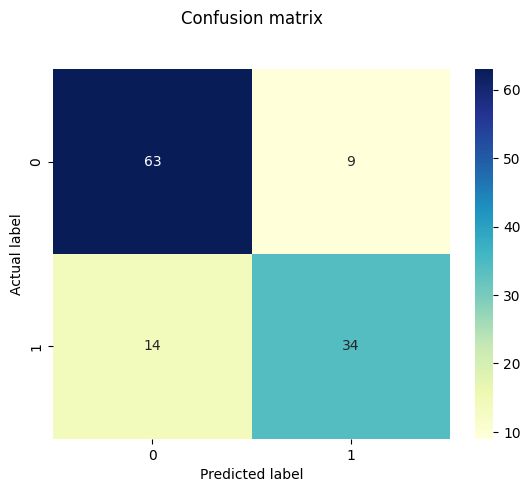

In [39]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

La salida de la matriz de confusión es una matriz 2*2 ya que el modelo es una clasificación binaria. Vamos a visualizarlo mejor utilizando un mapa de calor y explicarlo.

- 63 predicciones TN: ceros predichos correctamente.
- 14 predicciones FN: unos predichos erróneamente como ceros.
- 9 predicciones FP: ceros que se predijeron erróneamente como unos.
- 34 predicciones TP: unos predichos correctamente.

accuracy = (TN + TP)/ (TN + TP + FP + FN)


In [40]:
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy
# 0.8083333333333333

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
#0.8083333333333333

0.8083333333333333

## Metricas de la matriz de confusión

El informe_de_clasificación ofrece un informe más completo del rendimiento del modelo.



In [41]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



In [83]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Carga el conjunto de datos Iris
data = load_iris()
X = data.data
y = (data.target == 2).astype(int)  # Convertimos el problema en una clasificación binaria (Iris-Virginica o no)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular las probabilidades de los odds
probs = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades de ser clase 1 (Iris-Virginica)
print("Probabilidades de los odds:")
print(probs)

Precisión del modelo: 1.00
Matriz de confusión:
[[19  0]
 [ 0 11]]
Probabilidades de los odds:
[1.29536715e-01 1.88093216e-05 9.97114289e-01 2.32003046e-01
 2.96628016e-01 3.55784362e-05 3.76014071e-02 9.27205852e-01
 4.67760267e-01 5.27469202e-02 7.63477911e-01 1.57461218e-05
 1.12238172e-05 1.58685176e-05 1.27029723e-05 2.54841269e-01
 9.59291311e-01 4.66356877e-02 1.32977214e-01 9.59505212e-01
 2.19745071e-05 5.87325118e-01 3.73807791e-05 9.41832631e-01
 9.10472927e-01 9.41721533e-01 9.17704457e-01 9.69040594e-01
 3.37189144e-05 2.59824077e-05]


In [84]:
# Obtener los coeficientes y la intercepción del modelo
coeficientes = logistic_model.coef_
intercepcion = logistic_model.intercept_

# Imprimir los coeficientes y la intercepción
print("Coeficientes del modelo:")
print(coeficientes)
print("Intercepción del modelo:")
print(intercepcion)

# También puedes calcular las probabilidades de los odds manualmente
# Para una nueva observación 'X_new', puedes usar el método 'predict_proba'
X_new = np.array([[5.1, 3.5, 1.4, 0.2]])  # Reemplaza esto con tus propias características
X_new_scaled = scaler.transform(X_new)
probabilidades = logistic_model.predict_proba(X_new_scaled)[:, 1]  # Probabilidad de ser clase 1 (Iris-Virginica)
print("Probabilidades de los odds para una nueva observación:")
print(probabilidades)


Coeficientes del modelo:
[[ 0.17209228 -0.65550045  2.32662448  2.85231534]]
Intercepción del modelo:
[-3.71076821]
Probabilidades de los odds para una nueva observación:
[1.17924112e-05]
